# Outline
----------

## Part 0 - generalities about PyTorch

## Part I - MLP for CIFAR10 - (very little to do)
*(Part I = today = this = TP5.1)*

Outline of this notebook:

- 1. Load and normalize the CIFAR10 training and test datasets using ``torchvision``
- 2. Define an MLP
- 3. Define a loss function
-  4. Train the network on the training data

*Credits for Part I: Victor Berger, Guillaume Charpiat: https://www.lri.fr/~gcharpia/deeppractice/*

## Part II - MLP for Random Data - (you do everything)
*(Part II = today = next notebook = TP5.2)*

## Part III - CNN
*(Part III = probably next week = TP5.3)*

----------------



# Part 0 - generalities about PyTorch


## Some "references", about torch:

1) Very concrete example of autograd, on a simple polynomial model, just to show that it computes gradients for you:
- https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#warm-up-numpy

There, each torch line is heavily commented, even more so than in here (my TP5.1), I think.
(it's a tutorial but reported inside the official doc, so it also tells how you define your own functions, e.g. your own activation function)


2) Autograd explained with nice visuals (a bit lengthy, but the few equations + visual sketch, are nice)
- https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/

3) A simple MLP, with torch calls commented, but not as much as in my TP5.1:
- https://github.com/christianversloot/machine-learning-articles/blob/main/creating-a-multilayer-perceptron-with-pytorch-and-lightning.md



# Part I - MLP - demo

Today:

1. Load and normalize the CIFAR10 training and test datasets using
   ``torchvision``
2. Define an MLP
3. Define a loss function
4. Train the network on the training data


### 1.1 What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
ImageNet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

-----------------------


### 1.2 Loading PyTorch

In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
import torch.nn as nn
import torch.nn.functional as F

In [4]:
# this is not absolutely necesssary
import torchsummary


## 1.3 Load and normalize CIFAR10

---------------

Using ``torchvision``, it’s extremely easy to load CIFAR10.



The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



Note: If running on Windows and you get a BrokenPipeError, try setting     the `num_worker` of `torch.utils.data.DataLoader()` to 0.



In [ ]:
# ?transforms.Normalize

In [5]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
                              )
download=True
trainset = torchvision.datasets.CIFAR10(root='/home/flandes/data', train=True,
                                        download=download, transform=transform)
testset = torchvision.datasets.CIFAR10(root='/home/flandes/data', train=False,
                                       download=download, transform=transform)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [6]:
len(trainset), len(trainset[49000]), trainset[49000][0].shape, trainset[49000][1]

(50000, 2, torch.Size([3, 32, 32]), 8)

Let us show some of the training images, for fun.



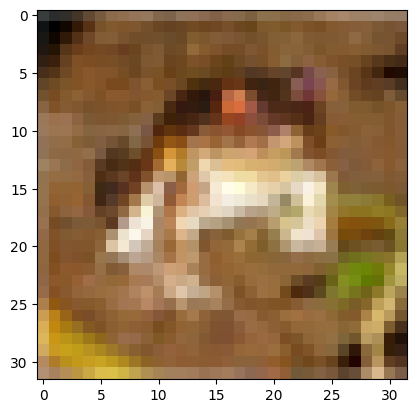

frog


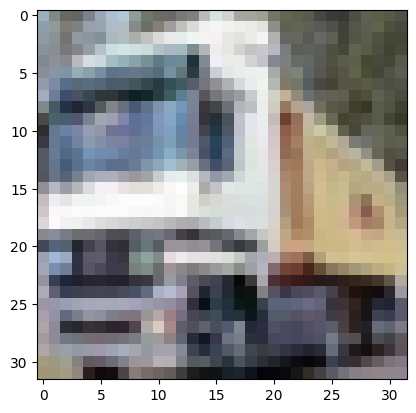

truck


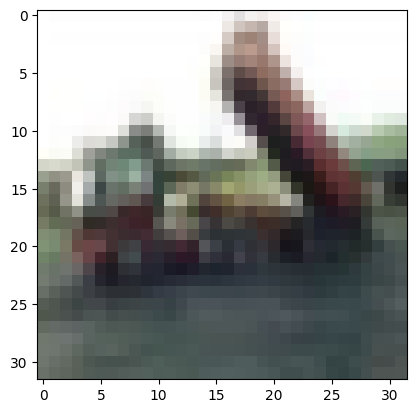

truck


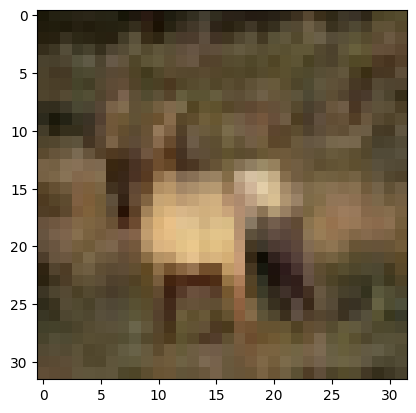

deer


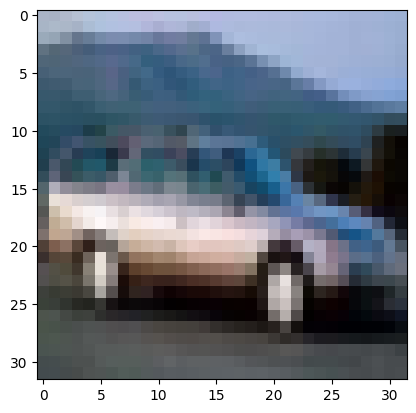

car


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

for n in range(5):
    imshow(trainset[n][0])
    print(classes[trainset[n][1]])

## 2. Define a Multi-Layer-Perceptron (MLP)

You can use for instance a single hidden layer with 20 neurons

# TODO: write the forward (this is the only actual TODO in this notebook)

In [15]:
# ?nn.Linear

In [21]:
class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()

        self.l1 = nn.Linear(3*32*32, 20)
        self.l2 = nn.Linear(20, 10)
        # Input size is : TODO?  , output size should be the same with the number of classes

    def forward(self, inputs):
        inputs = torch.flatten(inputs, 1) # flatten all dimensions except batch
        h = F.relu(self.l1(inputs))  ## called h because this is a (the) Hidden layer
        outputs = F.softmax(self.l2(h), dim=1) # Use softmax as the activation function for the last layer
        return outputs
# Create the model:
myMLP = Model()

In [22]:
# Create the model:
myMLP = Model()

In [23]:
torchsummary.summary(myMLP, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]          61,460
            Linear-2                   [-1, 10]             210
Total params: 61,670
Trainable params: 61,670
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 0.24
Estimated Total Size (MB): 0.25
----------------------------------------------------------------


## 3. Define a Loss function and optimizer


Let's use a Classification Cross-Entropy loss and SGD with momentum.

# TODO: you have nothing to write, just try to understand what happens

In [31]:
# Use Cross Entropy Loss
criterion = nn.CrossEntropyLoss()

# Use SGD optimizer with a learning rate of 0.1
# It is initialized on our model
optimizer = torch.optim.SGD(myMLP.parameters(), lr=0.1)

#### To understand very quickly the logic of torch,

 and how the gradients are passed to the network, see:

https://stackoverflow.com/a/63869655/1714410


## 4. Train the network

# TODO: you have nothing to write, just try to understand what happens



In [32]:
def train(num_epochs, batch_size, criterion, optimizer, model, trainset):

    # we re-define `trainloader` so as to be able to choose the batch size:
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

    model.train() ## tells pytorch we are in train mode, not in test mode.
    running_losses=[]
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            # zero the parameter's gradients
            optimizer.zero_grad()

            # forward + backward + optimize :
            ## forward pass
            outputs = model(inputs)  # because torch tensors keep parameters values AND the computational graph,
                                     # the torch object 'output' will be able to store also the gradients
            # note: outputs has a shape:  batch_size x #labels  = 4 x 10  (+gradients)

            ## backward pass
            loss = criterion(outputs, labels)  ## loss is also a torch object, so it also has the comput. graph.
            loss.backward() # computes and stores the gradients next to the tensors of parameters themselves.
            # at this point, the object 'model' has the gradients in it at the correct value.

            ## update of gradients
            optimizer.step() # updates the parameters wrt the local gradient
            ## recall that we defined:  optimizer = optim.SGD(model.parameters(), ... so it knows about the parameters.


            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_losses.append(running_loss/ 2000)
                running_loss = 0.0

    print('Finished Training')
    return running_losses

In [33]:
# play with the torch objects:
# return optimizer, loss and see what are their member methods/attributes by typing e.g.:
# optimizer. [and then press tab to see the list]

In [34]:
## we may run code from inside train, outside a function, to check out what hte various objects look like.
## TODO
# outputs
# outputs.grad_fn, outputs[0].grad_fn, outputs[1].grad_fn, outputs[3].grad_fn,

In [35]:
# Choose the hyperparameters for training:
num_epochs = 1  ## one epoch = all of the training examples. It's already quite a number of examples
batch_size = 4
model = myMLP
running_losses = train(num_epochs, batch_size, criterion, optimizer, model, trainset)


[1,  2000] loss: 2.175
[1,  4000] loss: 2.134
[1,  6000] loss: 2.139
[1,  8000] loss: 2.147
[1, 10000] loss: 2.140
[1, 12000] loss: 2.138
Finished Training


Text(0.5, 1.0, 'Visualization of convergence')

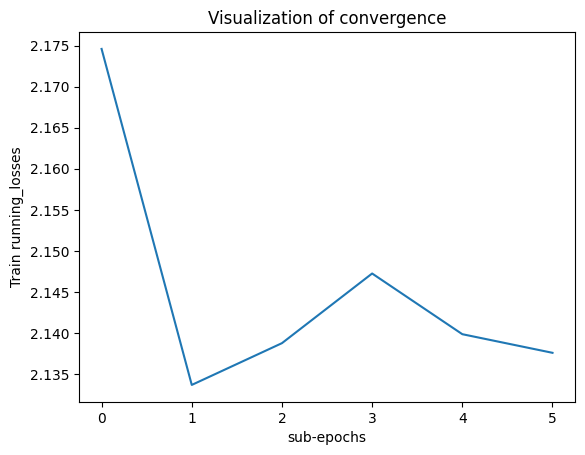

In [36]:
# plot the training error wrt. the number of epochs:
plt.plot(range(len(running_losses)), running_losses)
plt.xlabel("sub-epochs")
plt.ylabel("Train running_losses")
plt.title("Visualization of convergence")



## 5. Test the network on the test data

# TODO: you have nothing to write, just try to understand what happens

In [37]:
def accuracy(model, testset, batch_size) :
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

In [38]:
accuracy(myMLP, testset, batch_size)

Accuracy of the network on the 10000 test images: 33 %


### Note: here you should reach ~33% accuracy

# Summary of pytorch code (more convenient ?)


In [8]:
class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()

        self.l1 = nn.Linear(3*32*32, 20)
        self.l2 = nn.Linear(20, 10)
        # Input size is : TODO?  , output size should be the same with the number of classes

    def forward(self, inputs):
        inputs = torch.flatten(inputs, 1) # flatten all dimensions except batch
        h = F.relu(self.l1(inputs))  ## called h because this is a (the) Hidden layer
        outputs = F.softmax(self.l2(h), dim=1) # Use softmax as the activation function for the last layer
        return outputs
# Create the model:
myMLP = Model()

In [9]:
# Choose the hyperparameters for training:
num_epochs = 1
batch_size = 4

# Use mean squared loss function
criterion = nn.CrossEntropyLoss()

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model
optimizer = torch.optim.SGD(myMLP.parameters(), lr=0.1)

In [10]:
batch_size = 4  # it'd be better to set this later, to be able to choose the batch size later, just before training
# since batch_size is a hyper-parameter
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=1)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=1)

# get some random training images
# dataiter = iter(trainloader)
# images, labels = dataiter.next()  ## retro-compatibility broken

# # show images
# imshow(torchvision.utils.make_grid(images))
# # print labels
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [11]:
def train(num_epochs, batch_size, criterion, optimizer, model, trainset):
    # we re-define `trainloader` so as to be able to choose the batch size:
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

    model.train() ## tells pytorch we are in train mode, not in test mode.
    running_losses=[]
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            # zero the parameter's gradients
            optimizer.zero_grad()

            # forward + backward + optimize :
            ## forward pass
            outputs = model(inputs)  # because torch tensors keep parameters values AND the computational graph,
                                     # the torch object 'output' will be able to store also the gradients
            # note: outputs has a shape:  batch_size x #labels  = 4 x 10  (+gradients)

            ## backward pass
            loss = criterion(outputs, labels)  ## loss is also a torch object, so it also has the comput. graph.
            loss.backward() # computes and stores the gradients next to the tensors of parameters themselves.
            # at this point, the object 'model' has the gradients in it at the correct value.

            ## update of gradients
            optimizer.step() # updates the parameters wrt the local gradient
            ## recall that we defined:  optimizer = optim.SGD(model.parameters(), ... so it knows about the parameters.


            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_losses.append(running_loss/ 2000)
                running_loss = 0.0

    print('Finished Training')
    return running_losses

In [12]:
model = myMLP
running_losses = train(num_epochs, batch_size, criterion, optimizer, model, trainset)


[1,  2000] loss: 2.183
[1,  4000] loss: 2.141
[1,  6000] loss: 2.140
[1,  8000] loss: 2.143
[1, 10000] loss: 2.129
[1, 12000] loss: 2.136
Finished Training


Text(0.5, 1.0, 'Visualization of convergence')

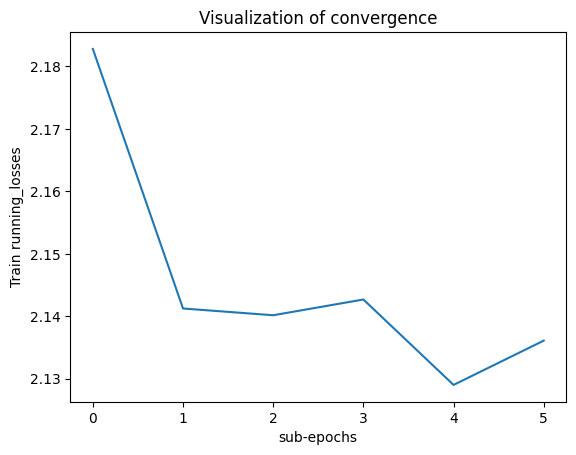

In [13]:
# plot the training error wrt. the number of epochs:
plt.plot(range(len(running_losses)), running_losses)
plt.xlabel("sub-epochs")
plt.ylabel("Train running_losses")
plt.title("Visualization of convergence")

In [14]:
def accuracy(model, testset, batch_size) :
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
accuracy(myMLP, testset, batch_size)

Accuracy of the network on the 10000 test images: 34 %


In [15]:
myMLP.state_dict()

OrderedDict([('l1.weight',
              tensor([[-1.8347e-02, -1.1935e-02, -3.6508e-02,  ...,  5.8006e-02,
                        4.7026e-02,  5.7242e-02],
                      [-1.2638e-02, -1.2591e-05, -8.2556e-03,  ...,  3.2404e-02,
                        3.7975e-02,  1.1002e-02],
                      [-6.5230e-02, -7.5888e-02, -6.5857e-02,  ...,  4.3755e-02,
                       -2.9833e-03, -4.1928e-03],
                      ...,
                      [-3.1827e-03, -6.0704e-03, -6.4111e-04,  ..., -1.7972e-02,
                       -2.5634e-02, -1.8785e-03],
                      [ 1.8389e-03,  2.1850e-02, -2.3524e-04,  ..., -2.7806e-02,
                       -7.2508e-03, -1.2318e-02],
                      [ 1.4271e-01,  1.0127e-01,  3.5279e-02,  ...,  3.4573e-02,
                        4.8610e-02,  6.2233e-02]])),
             ('l1.bias',
              tensor([-0.0116, -0.1504,  0.0231, -0.0619,  0.0396, -0.2926, -0.0323, -0.1970,
                       0.0422, -0.0329

In [16]:
type(myMLP)

__main__.Model

In [20]:
torchsummary.summary(myMLP, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]          61,460
            Linear-2                   [-1, 10]             210
Total params: 61,670
Trainable params: 61,670
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 0.24
Estimated Total Size (MB): 0.25
----------------------------------------------------------------
